![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

#### By Sandesh Balyan

# Face recognition
Task is to recognize faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [ ]:
import tensorflow
tensorflow.__version__

'2.3.0'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
random_state=1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Change current working directory to project folder

In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/03-project-face-recognition')

In [ ]:
#### Verifying the current working directory####
!pwd

/content/drive/My Drive/Colab Notebooks/03-project-face-recognition


We could see that the current working directory is now folder '03-project-face-recognition' in google drive

### Extract the zip file
- Extract Aligned Face Dataset from Pinterest.zip

In [1]:

## Already extracted No need to reun this code again
from zipfile import ZipFile

with ZipFile('Aligned Face Dataset from Pinterest.zip', 'r') as z:
  z.extractall()
print("Pinterest dataset extraction done!")


FileNotFoundError: ignored

Above code was run once and Folder PINS was created. There is no requirement to run this code again

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [ ]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)


metadata = load_metadata('PINS')

In [ ]:
metadata[70]

PINS/pins_Aaron Paul/Aaron Paul179_283.jpg

### Define function to load image
- Define a function to load image from the metadata

In [ ]:
import cv2
def load_image(path):
  img = cv2.imread(path,1)
  # OpenCV loads images with color channels
  # in BGR order. So we need to reverse them
  return img[...,::-1]

#### Load a sample image (3 marks)
- Load one image using the function "load_image"

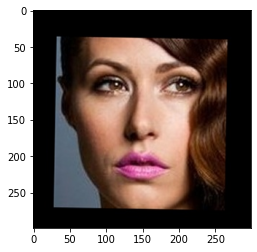

In [ ]:


#extracting path of working directory
wdPath = !pwd
#preparing Image path
imgPath = str(wdPath[0])+'/'+str(metadata[197])
#loading image using function load_image
image = load_image(imgPath)
plt.imshow(image)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [ ]:


def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [ ]:

model = vgg_face()

model.load_weights('vgg_face_weights.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

### Get vgg_face_descriptor

In [ ]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [ ]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images 
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in enumerate(tqdm(metadata,disable=False)):
  #### Add your code here ####
  img_path = m.image_path()

  try:
    img = load_image(img_path)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    embeddings[i] = embedding_vector
  except:
    embeddings[i] = np.zeros(2622)

print("Completed preparation of embedding vector")


Completed preparation of embedding vector


In [ ]:
embeddings

array([[ 0.0269818 ,  0.00204598, -0.00859916, ..., -0.0094026 ,
         0.00456265,  0.01609457],
       [ 0.03904547, -0.00011697, -0.0049203 , ...,  0.00934598,
        -0.00475354,  0.00846383],
       [ 0.01890971, -0.01153158, -0.00717932, ..., -0.00613234,
        -0.00189455,  0.01555714],
       ...,
       [ 0.00965871,  0.00372159, -0.01345864, ..., -0.01433404,
         0.01899943,  0.03899154],
       [ 0.00230931,  0.00094764, -0.00544815, ..., -0.01600495,
         0.01053974,  0.03683253],
       [ 0.01772299,  0.01064049,  0.01995195, ..., -0.02618429,
         0.03288926,  0.04882648]])

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [ ]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

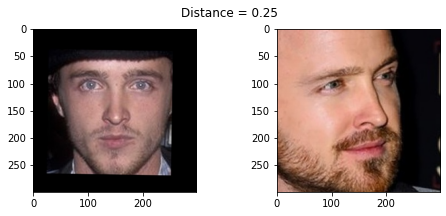

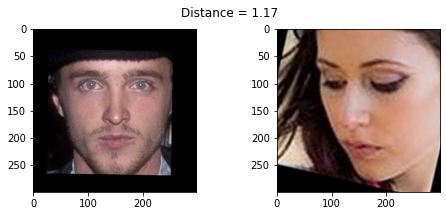

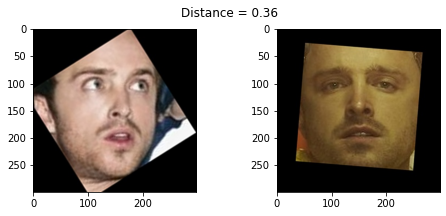

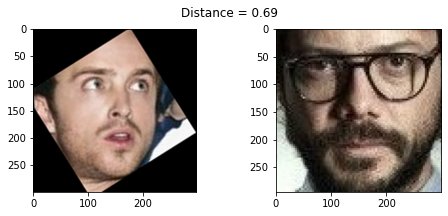

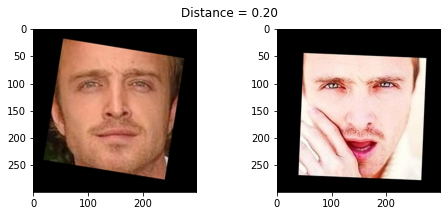

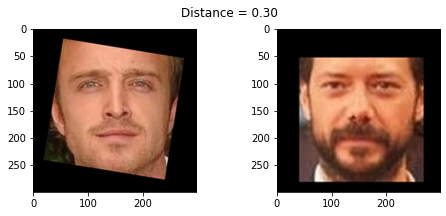

In [ ]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)
show_pair(30, 31)
show_pair(30, 100)
show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [ ]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = np.array(embeddings)[train_idx]
# another half as test examples of 10 identities
X_test = np.array(embeddings)[test_idx]

targets = np.array([m.name for m in metadata])
#train labels
y_train = targets[train_idx]
#test labels
y_test = targets[test_idx]

In [ ]:
print('Train shape : {0}'.format(X_train.shape))
print('Train labels : {0}'.format(y_train.shape))
print('Test shape : {0}'.format(X_test.shape))
print('Test labels : {0}'.format(y_test.shape))

Train shape : (9573, 2622)
Train labels : (9573,)
Test shape : (1197, 2622)
Test labels : (1197,)


### Encode the Labels
- Encode the targets
- Use LabelEncoder

In [ ]:


#### Add your code here ####
lblEncoder = LabelEncoder()
y_train_transformed = lblEncoder.fit_transform(y_train)
print(y_train_transformed)
print(y_train)

[ 0  0  0 ... 99 99 99]
['pins_Aaron Paul' 'pins_Aaron Paul' 'pins_Aaron Paul' ... 'pins_zendaya'
 'pins_zendaya' 'pins_zendaya']


In [ ]:
y_test_transformed = lblEncoder.transform(y_test)
print(y_test_transformed)
print(y_test)

[ 0  0  0 ... 99 99 99]
['pins_Aaron Paul' 'pins_Aaron Paul' 'pins_Aaron Paul' ... 'pins_zendaya'
 'pins_zendaya' 'pins_zendaya']


### Standardize the feature values 
- Scale the features using StandardScaler

In [ ]:
# Standarize features



sc = StandardScaler()
X_train_transformed = sc.fit_transform(X_train)
X_test_transformed = sc.transform(X_test)

X_train_transformed

array([[ 2.9535843 ,  0.0174239 , -0.73825562, ...,  2.23961292,
        -1.00951463, -0.38720207],
       [ 0.84707718, -0.95100037, -0.95270651, ...,  0.78322126,
        -0.73948585,  0.15892356],
       [ 4.51399208, -0.49385446, -1.36012198, ...,  0.245902  ,
         0.29841531, -0.20940959],
       ...,
       [-0.12071888,  0.34309078, -1.54880552, ...,  0.0115033 ,
         1.2339332 ,  1.9631783 ],
       [-0.88957767,  0.10774661, -0.78836504, ..., -0.14571648,
         0.43492286,  1.79695212],
       [ 0.72292807,  0.93009602,  1.62288206, ..., -1.10351466,
         2.54581596,  2.72038654]])

In [ ]:
X_test_transformed

array([[ 1.6915406 ,  0.20093052, -1.08749279, ...,  0.47551469,
        -0.12960818,  0.20030149],
       [ 2.75551425,  0.09900646,  0.52462871, ...,  1.66579083,
        -0.68228062, -0.35360275],
       [ 0.74875652,  0.33001905, -0.78306171, ...,  0.76036858,
        -1.30157149, -0.77914619],
       ...,
       [-0.24994871,  1.45697839,  0.08988196, ..., -0.32800441,
         0.95914635,  1.97634001],
       [ 0.8505459 ,  2.00223755, -0.11937595, ..., -1.01692747,
         1.66094626,  0.82213913],
       [ 0.35443729,  0.04528382,  0.09010153, ...,  0.35735176,
         1.8030858 ,  1.16464597]])

### Reduce dimensions using PCA
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [ ]:

pc = PCA(n_components=128)
pc.fit(X_train_transformed)
print('Total cumulative variance explained by 128 components is {0}%'.format(np.cumsum(pc.explained_variance_ratio_)[-1]*100))

Total cumulative variance explained by 128 components is 86.67625723436423%


**Observations :**

Total explained variance by 128 components is only 86.67% which is quite low. We shall try to find number of components which will explain atleast 95% of the total variance in data.


In [ ]:
pc=PCA()
pc.fit(X_train_transformed)
cumVariance = np.cumsum(pc.explained_variance_ratio_)*100
cumVariance


array([ 13.55804089,  18.96213981,  22.9432091 , ...,  99.99999982,
        99.99999999, 100.        ])

In [ ]:
#following code iterates through all the elements in the cumulative sum of explained variance
#and breaks at the index which explains more than threshold of the variance
explained_threshold = 95
index = 0
for i,val in enumerate(cumVariance):
  if val>explained_threshold:
    index=i
    break

print("Index/number of elements that explain 95 % of the variance are {0}".format(index))



Index/number of elements that explain 95 % of the variance are 347


**Observations:**
347 features explains a total of 95% of total variance. we shall use 347 features as against 128 suggested in the requriements

#### Plotting PCA explained variance

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(351, 90, '~ 347 features')

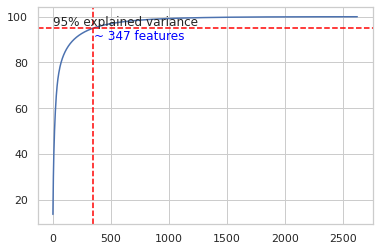

In [ ]:
import seaborn as sns
x = np.arange(0,len(cumVariance))
y1 = pc.explained_variance_
sns.set(style='whitegrid')
sns.lineplot(x,cumVariance)
plt.axhline(95, ls='--',c='red')
plt.text(1,96,'95% explained variance')
plt.axvline(index, ls='--',c='red')
plt.text(index+4,90,'~ 347 features',c='blue')

#### Reducing Features using 347 fetaures in PCA

In [ ]:
pc1 = PCA(n_components=index, random_state=random_state)
pc1.fit(X_train_transformed)

PCA(copy=True, iterated_power='auto', n_components=347, random_state=1,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X_train_pca = pc1.transform(X_train_transformed)
X_test_pca = pc1.transform(X_test_transformed)

print('Final Train shape {0}'.format(X_train_pca.shape))
print('Final Test shape {0}'.format(X_test_pca.shape))

Final Train shape (9573, 347)
Final Test shape (1197, 347)


### Build a Classifier
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

##### GridsearchCV to get best paramseters

In [ ]:


params_grid = [{'gamma': [0.001, 0.0001, 0.01], 'C': [1, 10, 100, 1000], 'class_weight': ['balanced', None],'kernel': ['rbf']}]

svc = GridSearchCV(SVC(random_state = random_state), params_grid, cv = 3, scoring = 'f1_macro', verbose = 50, n_jobs = -1)

svc.fit(X_train_pca, y_train)

print('Best estimator found by grid search:')
print(svc.best_estimator_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.

Best parameters are C=10 and Gamma=0.0001

IN below section we will rebuild the classifier using best parameters

In [ ]:



classifier = SVC(gamma=0.0001, C=10,class_weight='balanced', random_state=random_state)

classifier.fit(X_train_pca,y_train)
print('Train Accuracy: {}'.format(classifier.score(X_train_pca,y_train)))

Train Accuracy: 0.9990598558445628


In [ ]:
#predictions and score on test set obtained from pca
y_pred = classifier.predict(X_test_pca)

In [ ]:
y_pred

array(['pins_Aaron Paul', 'pins_Aaron Paul', 'pins_Aaron Paul', ...,
       'pins_zendaya', 'pins_zendaya', 'pins_zendaya'], dtype='<U29')

In [ ]:
y_test

array(['pins_Aaron Paul', 'pins_Aaron Paul', 'pins_Aaron Paul', ...,
       'pins_zendaya', 'pins_zendaya', 'pins_zendaya'], dtype='<U29')

In [ ]:

print('Test Accuracy : {0:.4f}'.format(accuracy_score(y_test,y_pred)))

Test Accuracy : 0.9582


In [ ]:
print('Classification Report: \n{}'.format(classification_report(y_test, y_pred)))

Classification Report: 
                               precision    recall  f1-score   support

              pins_Aaron Paul       1.00      1.00      1.00        10
            pins_Alvaro Morte       0.91      1.00      0.95        10
             pins_Amanda Crew       1.00      1.00      1.00        13
          pins_Amaury Nolasco       1.00      0.92      0.96        13
               pins_Anna Gunn       1.00      1.00      1.00         7
    pins_Benedict Cumberbatch       1.00      0.89      0.94         9
            pins_Betsy Brandt       1.00      1.00      1.00         8
        pins_Brenton Thwaites       0.88      1.00      0.93        14
            pins_Brit Marling       1.00      0.93      0.96        14
          pins_Bryan Cranston       0.90      1.00      0.95         9
              pins_Caity Lotz       0.81      1.00      0.90        13
        pins_Cameron Monaghan       0.93      1.00      0.96        13
          pins_Chance Perdomo       0.90      1.00  

### Test results
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

Text(0.5, 1.0, 'Identified as Alvaro Morte - Actual Name is Alvaro Morte')

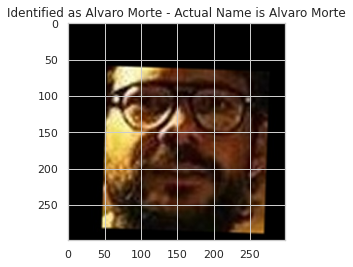

In [ ]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())


example_embedding_pca = X_test_pca[example_idx].reshape(1,-1)

#predict using Support vector machine classifier
example_prediction = classifier.predict(example_embedding_pca) #### Add your code here ####

#example_identity = lblEncoder.inverse_transform(example_prediction)[0]
example_identity =  example_prediction[0].split('_')[1]
example_actual_name = y_test[example_idx].split('_')[1]
plt.imshow(example_image)
plt.title(f'Identified as {example_identity} - Actual Name is {example_actual_name}')


# Conclusions

1. There are total 10770 images for 100 people
2. Total number of features are 2622. PCA was used to reduce the features to 347. 347 features explains about 95% of the total variance in data
3. 128 PCA features explains only 86% of the variance hence final classifier and feature reduction was not done using 128 features
4. Support Vector classifier was used as the final classifier to predict
5. Accuracy on train set is 99% while on test set is 95.8%
6. GridSearchCV was used to find best parameters {gamma=0.001, C=10} were used to build final classifier
7. Pretrained VGG Face model was used to prepare embedding vectors of images which worked fine.
